In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


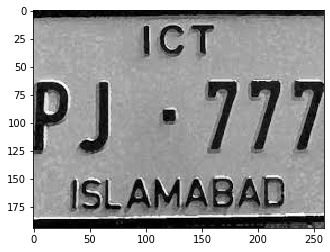

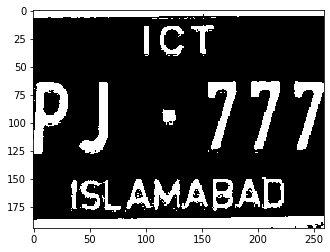

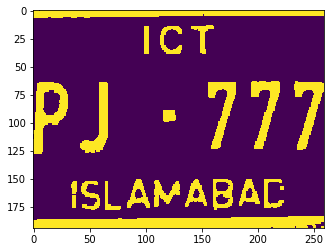

In [3]:
img=cv2.imread("plate2.jpeg",cv2.IMREAD_GRAYSCALE)
#img=cv2.resize(img,(150,150))
plt.imshow(img,cmap="gray")
plt.show()
ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)#binary
plt.imshow(thresh,cmap="gray")
plt.show()
kernel = np.ones((3,3),np.uint8)#opening
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 1)
plt.imshow(opening)
plt.show()


In [30]:
x=img.shape[0]
y=img.shape[1]
area_orig=x*y
print(x,y,area_orig)

cnts,heir = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
sorted_ctrs = sorted(cnts, key=lambda ctr: cv2.boundingRect(ctr)[0])

194 259 50246


In [83]:
# c_area=[]
# for x in sorted_ctrs:
#     if(cv2.contourArea(x)>0):
#         c_area.append(cv2.contourArea(x))
        
med = np.median(sorted([cv2.contourArea(x) for x in sorted_ctrs if cv2.contourArea(x) > 0])[-8:]) / area_orig

# print(sorted(c_area))

In [84]:
med

0.011379015244994626

In [ ]:
### [cv2.contourArea(x) for x in sorted_ctrs if cv2.contourArea(x) > 0]

2.0
20.0
4.0
85.5
149.5
34.0
223.0
123.5
224.5
51.0
409.0
89.5
96.5
225.0
48.5
247.0
51.0
90.0
536.0
545.5
1098.5
285.0
576.5
562.0
166.5
72.0
129.5


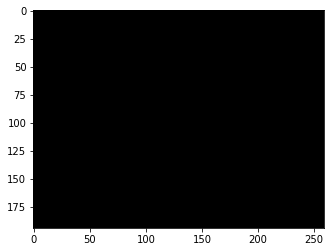

In [91]:
cnts,heir = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
zero=np.zeros((img.shape[0],img.shape[1],3))
f_c=[]
for x in cnts :
    c_area=cv2.contourArea(x)
    #print(c_area)
    if((c_area<1100)and(c_area>0)):
        print(c_area)
        f_c.append(x)
        #cv2.drawContours(zero, x, -1, (0,255,0), 3)
#         plt.imshow(zero)
#         plt.show()
        
# cv2.drawContours(zero, cnts, -1, (0,255,0), 3)
plt.imshow(zero)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


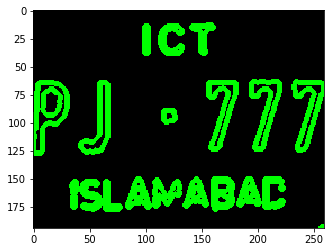

In [92]:
cv2.drawContours(zero, f_c, -1, (0,255,0), 3)
plt.imshow(zero)
plt.show()

In [87]:
len(f_c)

26

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


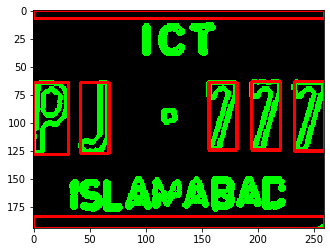

In [93]:
sort_dict={}
for c in cnts:
    (x, y, W, H) = cv2.boundingRect(c)
    area=W*H
    if((area/area_orig)>med):
        sort_dict[x]=img[y:y+H, x:x+W]
        cv2.rectangle(zero,(x,y),(x+W,y+H),(255,0,0),2)
        roi = img[y:y+H, x:x+W]
#         plt.imshow(roi)
#         plt.show()
plt.imshow(zero)

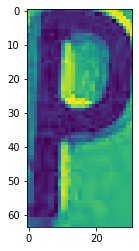

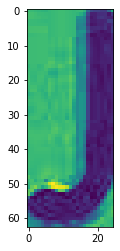

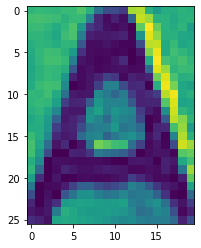

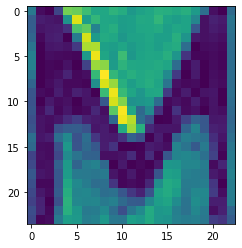

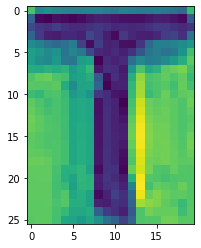

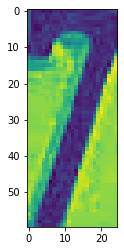

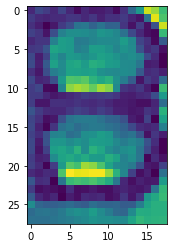

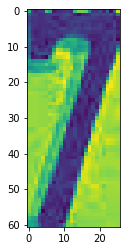

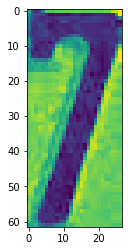

In [60]:
for i in sorted (sort_dict.keys()) :  
    plt.imshow(sort_dict[i])
    plt.show()

In [52]:
sort_li=sorted(sort_dict)
for x in sort_li:
    if x


SyntaxError: invalid syntax (<ipython-input-52-9cabf1c97562>, line 2)

In [4]:
from skimage import measure
labels = measure.label(thresh, neighbors=8, background=0)
charCandidates = np.zeros(thresh.shape, dtype="uint8")


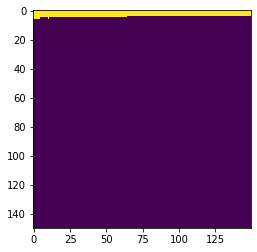

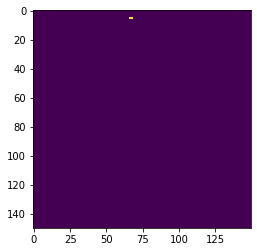

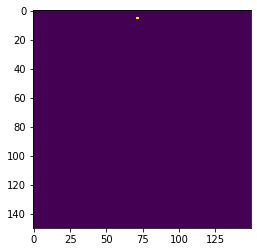

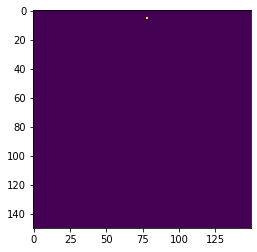

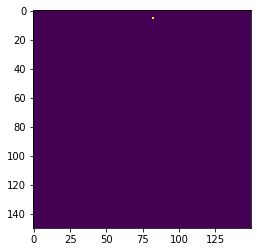

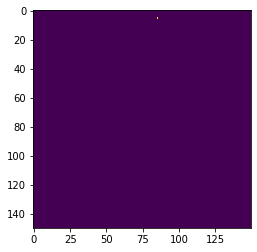

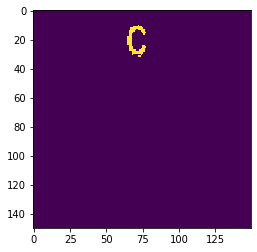

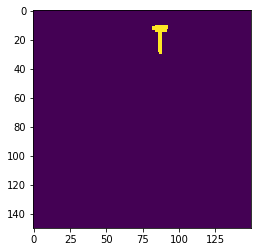

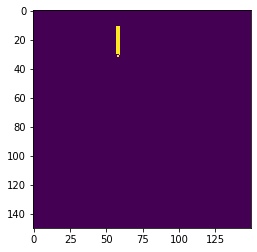

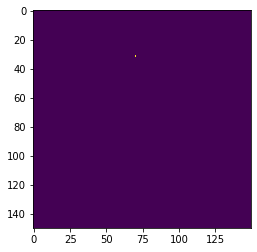

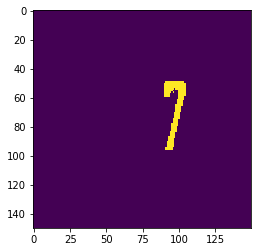

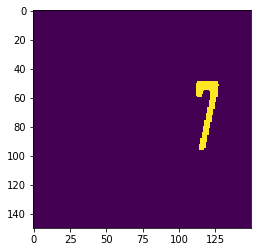

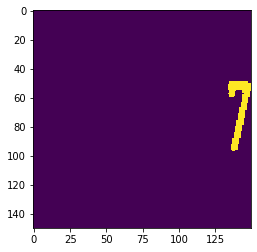

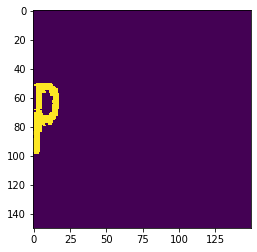

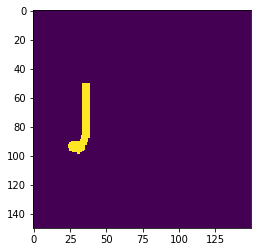

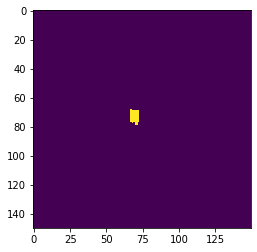

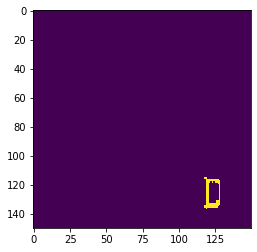

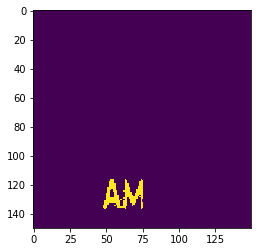

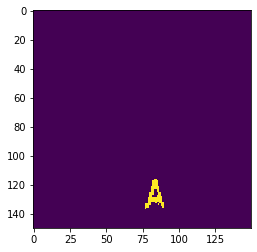

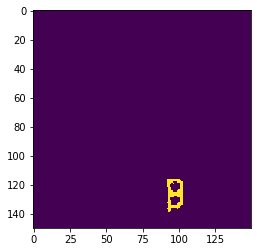

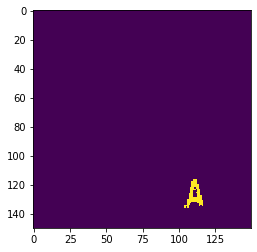

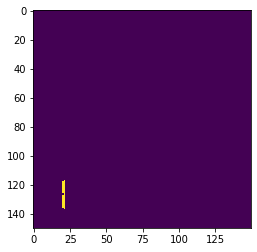

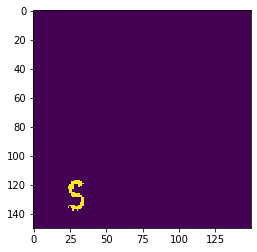

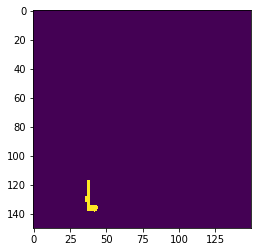

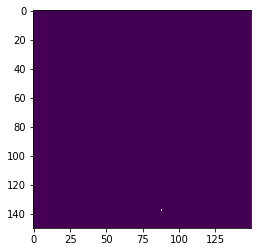

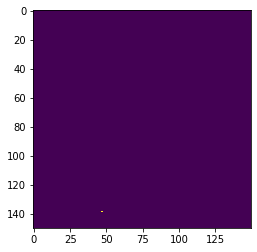

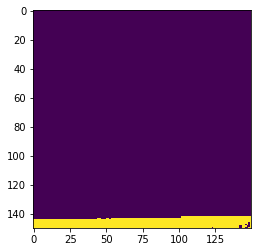

In [10]:
from imutils import perspective
import imutils

cts=[]
# loop over the unique components
for label in np.unique(labels):
    # if this is the background label, ignore it
    if label == 0:
        continue

    # otherwise, construct the label mask to display only connected components for the
    # current label, then find contours in the label mask
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    plt.imshow(labelMask)
    plt.show()
    cnts,heir = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cts.append(cnts)

In [13]:
len(cts)

27

In [59]:
cnts

array([[[145, 147]],

       [[146, 146]],

       [[147, 147]],

       [[146, 148]]], dtype=int32)

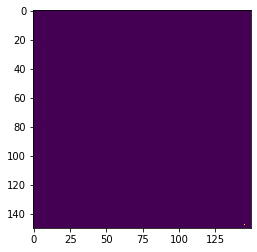

In [53]:
from skimage import segmentation
charCandidates = segmentation.clear_border(charCandidates)
plt.imshow(charCandidates)

In [3]:
def gettincntrs(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #grayscale
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)#binary
    kernel = np.ones((3,3),np.uint8)#opening
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 1)
    edged = cv2.Canny(opening, 30, 200)#canny edges
    ctrs, hier = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)#contours
    sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    return ctrs,sorted_ctrs

In [6]:
ctrs,s_cntrs=gettincntrs(img)

In [7]:
img2=img

for i, ctr in enumerate(s_cntrs):
    x, y, w, h = cv2.boundingRect(ctr)
    area=w*h
    if (area>500):
        cv2.rectangle(img2,(x,y),(x+w,y+h),(255,0,0),2)

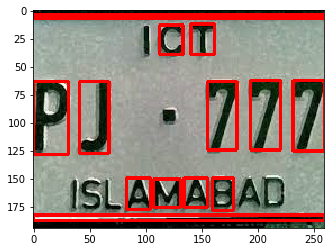

In [8]:
plt.imshow(img2,cmap="gray")